In [45]:

from matplotlib import cm, pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
import time
from sklearn import svm
from sklearn.model_selection import train_test_split
from tqdm import tqdm


class K_nn:
    def __init__(self,k=3):
        self.k=k


    def fit(self,X,y):
        if not isinstance(y, (np.ndarray, np.generic) ):
            X=X.to_numpy()
            y=y.to_numpy()
        self.X=X
        self.y=y

    def distance(self,x1,x2):
        return sum(pow(x1-x2,2))

    def predict(self,x):
        if isinstance(x, (np.ndarray, np.generic) ):
            data=x
        else:
            data=x.to_numpy()
        retY=[]
        for j in data:
            dist=np.sum(pow(self.X-j,2),axis=1)
            kn=self.k
            while True:
                neighbor=self.y[np.argsort(dist)[:kn]]
                occ =[neighbor.tolist().count(kk) for kk in range(10)]
                m= max(occ)
                if (occ.count(m)==1):
                    retY.append(occ.index(m))
                    break
                kn+=1
        return retY

    def set_params(self,**arg):
        self.k=arg["k"]
        print(self.k)



def fold(n,k):
    ret=[]
    fl=n//k
    item=np.arange(n)
    for i in range(k):
       ret.append(
           [item[i*fl:(i+1)*fl],
           np.concatenate([item[:i*fl],item[(i+1)*fl:]])]
       )
    return ret



def load_dataset(partition):
    X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
    y = y.astype(int)[:int(len(X)*partition//1)]
    X = X/255
    X=X[:int(len(X)*partition//1)]
    return X,y

In [5]:

X,y=load_dataset(.5)
X1=X.drop(X.columns[np.std(X)==0.0],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=.20, random_state=56)
;

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


''

In [57]:
from numpy import mean
def tune_parameter(parvalues,k_fold,X,y):
    X=X.to_numpy()
    y=y.to_numpy()
    acc=[]
    for i in range(len(parvalues)):
        acc.append([])
        for test_p,train_p in fold(len(X),k_fold):
            cl=K_nn(k=parvalues[i])
            cl.fit(X[train_p],y[train_p])
            acc[i].append(accuracy_score(y[test_p],cl.predict(X[test_p])))
        print(mean(acc[i]))
    return acc

In [58]:
c=[3,5]
t_acc=tune_parameter(c,10,X_train,y_train)

0.9645714285714286
0.9617142857142857


validation time mean 30 min

In [59]:
start=time.time()
cl = K_nn(3)
cl.fit(X_train,y_train)
end = time.time()
print("Train time "+str(int(end - start))+"s")

Train time 0s


In [60]:
from sklearn.metrics import accuracy_score
start=time.time()
print("accuracy "+str(accuracy_score(y_test,cl.predict(X_test))))
end = time.time()
print("Test time "+str(int(end - start))+"s")

accuracy 0.9708571428571429
Test time 630s


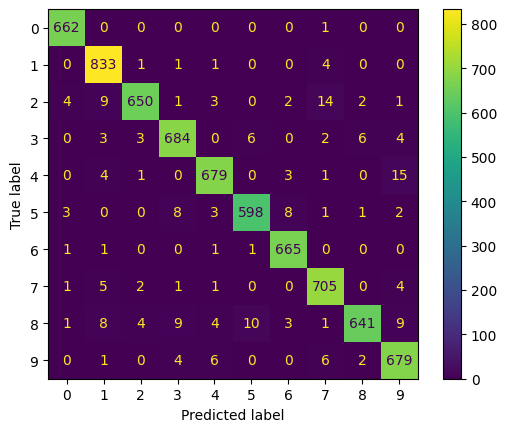

In [62]:
from sklearn import metrics
from numpy import arange
confusion_matrix = metrics.confusion_matrix(y_test, cl.predict(X_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = arange(10))

cm_display.plot()
plt.show()